# **MINOR PROJECT**

---






## ***Credit Card Approval Prediction:***

---









In [ ]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df_app=pd.read_csv('application_record.csv')
df_app.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [ ]:
df_app.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [ ]:
df_app[df_app.duplicated()]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS


In [ ]:
df_credit=pd.read_csv('credit_record.csv')
df_credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [ ]:
df_credit.STATUS.unique()


array(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype=object)

# **TASK 1** - Exploratory Data Analysis

The status is divided into different categories:

*  0: 1-29 days past due - This status indicates that the payment is overdue by 1 to 29 days.

*  1: 30-59 days past due - This status indicates that the payment is overdue by 30 to 59 days.

*  2: 60-89 days overdue - This status indicates that the payment is overdue by 60 to 89 days.

* 3: 90-119 days overdue - This status indicates that the payment is overdue by 90 to 119 days.

*  4: 120-149 days overdue - This status indicates that the payment is overdue by 120 to 149 days.

*  5: Overdue or bad debts, write-offs for more than 150 days - This status indicates that the payment is overdue for more than 150 days or considered a bad debt that needs to be written off.

*  C: paid off that month - This status indicates that the loan has been paid off during the month.

*  X: No loan for the month - This status indicates that there is no loan associated with that particular month.




In [ ]:
df_credit.shape

(1048575, 3)

In [ ]:
df_credit.describe()

,ID,MONTHS_BALANCE
count,1.048575e+06,1.048575e+06
mean,5.068286e+06,-1.913700e+01
std,4.615058e+04,1.402350e+01
min,5.001711e+06,-6.000000e+01
25%,5.023644e+06,-2.900000e+01
50%,5.062104e+06,-1.700000e+01
75%,5.113856e+06,-7.000000e+00
max,5.150487e+06,0.000000e+00


<Axes: >

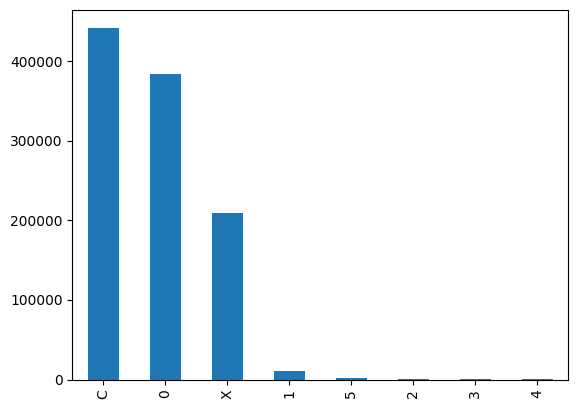

In [ ]:
df_credit.STATUS.value_counts().plot.bar()

### Creating a data frame wherein the status column is separated according to all the categories

In [ ]:
credit_grouped=pd.get_dummies(data=df_credit,columns=['STATUS'],
                              prefix='',prefix_sep='').groupby('ID')[sorted(df_credit['STATUS'].unique().tolist())].sum()
credit_grouped=credit_grouped.rename(columns=
                      {'0':'pastdue_1_29','1':'pastdue_30_59','2':'pastdue_60_89','3':'pastdue_90_119','4':'pastdue_120_149','5':'pastdue_over_150',
                       'C':'paid_off','X':'no_loan',})

overall_pastdue=['pastdue_1_29','pastdue_30_59',    'pastdue_60_89',    'pastdue_90_119'    ,'pastdue_120_149', 'pastdue_over_150']
credit_grouped['number_of_months']=df_credit.groupby('ID')['MONTHS_BALANCE'].count()
credit_grouped['over_90']=credit_grouped[['pastdue_90_119'  ,'pastdue_120_149'  ,'pastdue_over_150']].sum(axis=1)
credit_grouped['less_90']=credit_grouped[['pastdue_1_29','pastdue_30_59',   'pastdue_60_89']].sum(axis=1)
credit_grouped['overall_pastdue']=credit_grouped[overall_pastdue].sum(axis=1)
credit_grouped['paid_pastdue_diff']=credit_grouped['paid_off']- credit_grouped['overall_pastdue']
credit_grouped.head()

,pastdue_1_29,pastdue_30_59,pastdue_60_89,pastdue_90_119,pastdue_120_149,pastdue_over_150,paid_off,no_loan,number_of_months,over_90,less_90,overall_pastdue,paid_pastdue_diff
ID,,,,,,,,,,,,,
5001711,3,0,0,0,0,0,0,1,4,0,3,3,-3
5001712,10,0,0,0,0,0,9,0,19,0,10,10,-1
5001713,0,0,0,0,0,0,0,22,22,0,0,0,0
5001714,0,0,0,0,0,0,0,15,15,0,0,0,0
5001715,0,0,0,0,0,0,0,60,60,0,0,0,0


###Good and Bad Customers
**Good customer: credit card approved**:
--> If the difference between number of times customer paid off and the number of lately paid is more than 3 or no_loan is equal to number of months , he/she's credit card is approved.

--> also check if he too late or pay off in small period and has a suitable differance
paid_pastdue_diff >=-2 and paid_pastdue_diff < 3
check and less_90 >= over_90 good


--> If the customer doesn't achive this conditions then he is a **bad customer: credit card not approved**.

In [ ]:
target=[]
for index,row in credit_grouped.iterrows() :
  if row['paid_pastdue_diff'] >=3 or (row ['no_loan']==row['number_of_months']) :
    target.append(1)
  elif row['paid_pastdue_diff'] >-2 and row['paid_pastdue_diff'] <3 and (row['less_90'] >=row['over_90']) :
    target.append(1)
  else:
    target.append(0)

credit_grouped['good_or_bad']=target
credit_grouped['good_or_bad'].value_counts()

1    24083
0    21902
Name: good_or_bad, dtype: int64

### **This classification solves the problem of unbalanced data as well which was mentioned in the problem statement.**

In [ ]:
credit_grouped.shape

(45985, 14)

In [ ]:
credit_grouped.head()

,pastdue_1_29,pastdue_30_59,pastdue_60_89,pastdue_90_119,pastdue_120_149,pastdue_over_150,paid_off,no_loan,number_of_months,over_90,less_90,overall_pastdue,paid_pastdue_diff,good_or_bad
ID,,,,,,,,,,,,,,
5001711,3,0,0,0,0,0,0,1,4,0,3,3,-3,0
5001712,10,0,0,0,0,0,9,0,19,0,10,10,-1,1
5001713,0,0,0,0,0,0,0,22,22,0,0,0,0,1
5001714,0,0,0,0,0,0,0,15,15,0,0,0,0,1
5001715,0,0,0,0,0,0,0,60,60,0,0,0,0,1


([<matplotlib.patches.Wedge at 0x7cd871cd9060>,
 [Text(-0.08187475783016696, 1.0969487335469474, '1'),
  Text(0.0818747578301673, -1.0969487335469474, '0')],
 [Text(-0.044658958816454694, 0.5983356728437894, '52.37%'),
  Text(0.04465895881645489, -0.5983356728437894, '47.63%')])

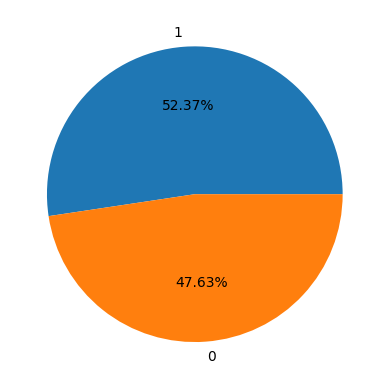

In [ ]:
keys = ['1', '0']
plt.pie(credit_grouped['good_or_bad'].value_counts(),autopct='%1.2f%%',labels=keys)

## OBSERVATIONS

Of the total, **52%** are **approved** while the rest **47%** are **unapproved**.



### **Merging the data set**

In [ ]:
features=['no_loan',    'number_of_months', 'over_90',  'less_90',  'overall_pastdue'   ,'paid_pastdue_diff','good_or_bad']
most_important_features=credit_grouped.loc[:,features]
customers_df=pd.merge(df_app,most_important_features,on='ID')
customers_df.index=customers_df['ID']
customers_df=customers_df.drop('ID',axis=1)
customers_df

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,...,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,no_loan,number_of_months,over_90,less_90,overall_pastdue,paid_pastdue_diff,good_or_bad
ID,,,,,,,,,,,,,,,,,,,,,
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,...,0,NaN,2.0,1,16,0,2,2,11,1
5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,...,0,NaN,2.0,1,15,0,2,2,10,1
5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,...,0,Security staff,2.0,16,30,0,7,7,0,1
5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,...,1,Sales staff,1.0,3,5,0,2,2,-2,0
5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,...,1,Sales staff,1.0,5,5,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,...,0,Managers,2.0,8,12,4,0,4,-4,0
5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,...,1,Medicine staff,2.0,0,24,9,10,19,-14,0
5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,...,1,Medicine staff,2.0,0,33,9,10,19,-5,0


In [ ]:
relation=customers_df.groupby(['CODE_GENDER','good_or_bad']).size().reset_index().rename(columns={0:'Count'})
relation.head()

,CODE_GENDER,good_or_bad,Count
0,F,0,11954
1,F,1,12476
2,M,0,5795
3,M,1,6232


In [ ]:

relation_df=customers_df[['CODE_GENDER','good_or_bad']]
relation_df.head()

,CODE_GENDER,good_or_bad
ID,,
5008804,M,1
5008805,M,1
5008806,M,1
5008808,F,0
5008809,F,1


In [ ]:
from scipy import stats
gender_approval = pd.crosstab(relation_df['CODE_GENDER'], relation_df['good_or_bad'])
approval_rate_male = gender_approval.loc['M', 1] / gender_approval.loc['M'].sum()
approval_rate_female = gender_approval.loc['F', 1] / gender_approval.loc['F'].sum()



print('Approval Rate for Male:', approval_rate_male)
print('Approval Rate for Female:', approval_rate_female)


Approval Rate for Male: 0.5181674565560821
Approval Rate for Female: 0.510683585755219


##Gender has no upper hand in determination of good or bad customers.









In [ ]:
x=customers_df.loc[:,:'paid_pastdue_diff']
y=customers_df['good_or_bad']
x

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,...,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,no_loan,number_of_months,over_90,less_90,overall_pastdue,paid_pastdue_diff
ID,,,,,,,,,,,,,,,,,,,,,
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,...,0,0,NaN,2.0,1,16,0,2,2,11
5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,...,0,0,NaN,2.0,1,15,0,2,2,10
5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,...,0,0,Security staff,2.0,16,30,0,7,7,0
5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,...,1,1,Sales staff,1.0,3,5,0,2,2,-2
5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,...,1,1,Sales staff,1.0,5,5,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,...,0,0,Managers,2.0,8,12,4,0,4,-4
5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,...,1,1,Medicine staff,2.0,0,24,9,10,19,-14
5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,...,1,1,Medicine staff,2.0,0,33,9,10,19,-5


### **SPLITTING DATA INTO THE RATIO OF 80:20 (train:test)**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

### DATA CLEANING
1.FLAG_MOBILE because it has one value

2.FLAG_WORK_PHONE ,because it has small effect to determine bad or good

3.FLAG_PHONE ,because it has small effect to determine bad or good

4.FLAG_EMAIL ,because it has small effect to determine bad or good

In [ ]:
x_train=x_train.drop(['FLAG_MOBILE','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL'],axis=1)

In [ ]:
x_train

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,no_loan,number_of_months,over_90,less_90,overall_pastdue,paid_pastdue_diff
ID,,,,,,,,,,,,,,,,,,,
5061197,F,N,Y,1,135000.0,Working,Secondary / secondary special,Civil marriage,With parents,-11567,-655,Sales staff,3.0,41,46,0,5,5,-5
5088935,F,N,Y,1,292500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-17781,-9044,Private service staff,3.0,1,18,0,17,17,-17
5142256,F,N,N,0,171000.0,State servant,Secondary / secondary special,Single / not married,House / apartment,-19570,-1625,Laborers,1.0,14,28,0,14,14,-14
5061293,F,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23021,365243,NaN,2.0,0,23,0,8,8,7
5062023,F,N,Y,0,139500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-20514,-5707,NaN,2.0,0,40,0,3,3,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5089700,F,N,N,0,135000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23056,365243,NaN,2.0,2,10,0,8,8,-8
5135839,F,Y,Y,0,90000.0,Pensioner,Higher education,Married,House / apartment,-21452,365243,NaN,2.0,0,17,0,3,3,11
5125595,F,N,N,0,157500.0,Working,Incomplete higher,Separated,House / apartment,-11404,-1868,NaN,1.0,0,8,0,8,8,-8



**Converting DAYS_BIRTH to AGE and DAYS_EMPLOYED to WORK_YEARS**

In [ ]:

x_train['AGE']=(x_train['DAYS_BIRTH']/365)*-1
x_train['AGE']=x_train['AGE'].apply(lambda v : int(v))
x_train['WORK_YEARS']=x_train['DAYS_EMPLOYED']/365
x_train['WORK_YEARS']=x_train['WORK_YEARS'].apply(lambda v : int(v*-1) if v <0 else 0)
x_train=x_train.drop(columns=['DAYS_BIRTH','DAYS_EMPLOYED'])
x_train

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,no_loan,number_of_months,over_90,less_90,overall_pastdue,paid_pastdue_diff,AGE,WORK_YEARS
ID,,,,,,,,,,,,,,,,,,,
5061197,F,N,Y,1,135000.0,Working,Secondary / secondary special,Civil marriage,With parents,Sales staff,3.0,41,46,0,5,5,-5,31,1
5088935,F,N,Y,1,292500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,Private service staff,3.0,1,18,0,17,17,-17,48,24
5142256,F,N,N,0,171000.0,State servant,Secondary / secondary special,Single / not married,House / apartment,Laborers,1.0,14,28,0,14,14,-14,53,4
5061293,F,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Married,House / apartment,NaN,2.0,0,23,0,8,8,7,63,0
5062023,F,N,Y,0,139500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,NaN,2.0,0,40,0,3,3,34,56,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5089700,F,N,N,0,135000.0,Pensioner,Secondary / secondary special,Married,House / apartment,NaN,2.0,2,10,0,8,8,-8,63,0
5135839,F,Y,Y,0,90000.0,Pensioner,Higher education,Married,House / apartment,NaN,2.0,0,17,0,3,3,11,58,0
5125595,F,N,N,0,157500.0,Working,Incomplete higher,Separated,House / apartment,NaN,1.0,0,8,0,8,8,-8,31,5


### Removing COLUMN CNT_CHILDREN as it is being already considered in CNT_FAM_MEMBERS

In [ ]:
x_train=x_train.drop(columns=['CNT_CHILDREN'])

Most Common Income Type: Working


<ipython-input-33-b0a22a1f79dc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers_df, x='NAME_INCOME_TYPE', palette='viridis')


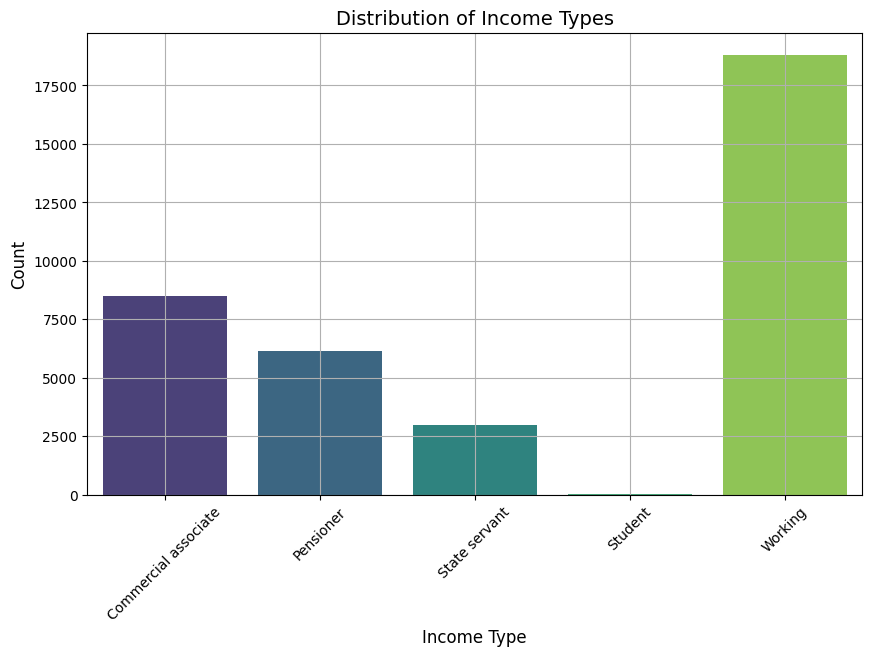

In [ ]:
customers_df['NAME_INCOME_TYPE'] = customers_df['NAME_INCOME_TYPE'].astype('category')
customers_df['NAME_EDUCATION_TYPE'] = customers_df['NAME_EDUCATION_TYPE'].astype('category')
most_common_income_type = customers_df['NAME_INCOME_TYPE'].value_counts().idxmax()
most_common_education_type = customers_df['NAME_EDUCATION_TYPE'].value_counts().idxmax()
print("Most Common Income Type: {}".format(most_common_income_type))

# Plot of income types
plt.figure(figsize=(10, 6))
sns.countplot(data=customers_df, x='NAME_INCOME_TYPE', palette='viridis')
plt.xlabel('Income Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Income Types', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()




In [ ]:
customers_df.isnull().sum()

CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        11323
CNT_FAM_MEMBERS            0
no_loan                    0
number_of_months           0
over_90                    0
less_90                    0
overall_pastdue            0
paid_pastdue_diff          0
good_or_bad                0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
imputer =SimpleImputer(strategy='most_frequent')
x_imputed=pd.DataFrame(imputer.fit_transform(x_train),index=x_train.index,columns=x_train.columns)
# Imputer change the type of the features so we should reset it again
x_imputed=x_imputed.astype(x_train.dtypes)

x_imputed['no_loan']=x_imputed['no_loan'].astype('int64')
x_imputed['CNT_FAM_MEMBERS']=x_imputed['CNT_FAM_MEMBERS'].astype('int64')
x_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29165 entries, 5061197 to 5022223
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CODE_GENDER          29165 non-null  object 
 1   FLAG_OWN_CAR         29165 non-null  object 
 2   FLAG_OWN_REALTY      29165 non-null  object 
 3   AMT_INCOME_TOTAL     29165 non-null  float64
 4   NAME_INCOME_TYPE     29165 non-null  object 
 5   NAME_EDUCATION_TYPE  29165 non-null  object 
 6   NAME_FAMILY_STATUS   29165 non-null  object 
 7   NAME_HOUSING_TYPE    29165 non-null  object 
 8   OCCUPATION_TYPE      29165 non-null  object 
 9   CNT_FAM_MEMBERS      29165 non-null  int64  
 10  no_loan              29165 non-null  int64  
 11  number_of_months     29165 non-null  int64  
 12  over_90              29165 non-null  int64  
 13  less_90              29165 non-null  int64  
 14  overall_pastdue      29165 non-null  int64  
 15  paid_pastdue_diff    29165 n

###OBSERVATIONS
There were **11323 missing values** in **OCCUPATION COLUMN.**

I have handled it using **Imputation method** by filing the places with the **most frequent values**.

Most Common Education Type: Secondary / secondary special


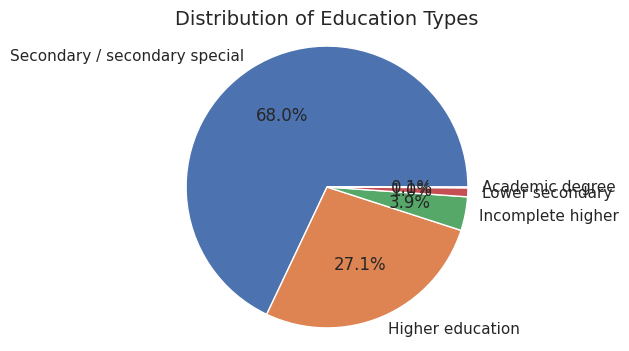

In [ ]:
print("Most Common Education Type: {}".format(most_common_education_type))

plt.figure(figsize=(4, 4))
sns.set(style='whitegrid')
sns.color_palette("viridis")
education_type_counts = customers_df['NAME_EDUCATION_TYPE'].value_counts()

plt.pie(education_type_counts.values, labels=education_type_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Education Types', fontsize=14)
plt.axis('equal')
plt.show()

###OBSERVATION
The most **common education type** is **secondary(68%)**.


##Dealing with categorical value

In [ ]:
from pandas.core.algorithms import value_counts
categorical_df=x_imputed.select_dtypes('object')
categorical_df.nunique()

CODE_GENDER             2
FLAG_OWN_CAR            2
FLAG_OWN_REALTY         2
NAME_INCOME_TYPE        5
NAME_EDUCATION_TYPE     5
NAME_FAMILY_STATUS      5
NAME_HOUSING_TYPE       6
OCCUPATION_TYPE        18
dtype: int64

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.7 MB/s eta 0:00:00


In [ ]:
from category_encoders import MEstimateEncoder
target_encoder=MEstimateEncoder(m=5,cols=['OCCUPATION_TYPE'])

x_encode=x_imputed.sample(frac=0.25)
y_encode=y_train[x_encode.index]
target_encoder.fit(x_encode,y_encode)

x_encoded=target_encoder.transform(x_imputed)
x_encoded['OCCUPATION_TYPE'].unique()

array([0.5424762 , 0.52171437, 0.50792976, 0.51905756, 0.59436641,
       0.48640264, 0.5724252 , 0.55895527, 0.42627683, 0.43087116,
       0.53938646, 0.51533371, 0.45780713, 0.43847624, 0.39847643,
       0.69666913, 0.60419062, 0.47817172])

In [ ]:
unique_values_array = x_encoded['OCCUPATION_TYPE'].unique()
unique_values_count = len(unique_values_array)

print("Number of unique values:", unique_values_count)

Number of unique values: 18


In [ ]:
numiric_data=x_encoded._get_numeric_data()
numiric_data

,AMT_INCOME_TOTAL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,no_loan,number_of_months,over_90,less_90,overall_pastdue,paid_pastdue_diff,AGE,WORK_YEARS
ID,,,,,,,,,,,
5061197,135000.0,0.542476,3,41,46,0,5,5,-5,31,1
5088935,292500.0,0.521714,3,1,18,0,17,17,-17,48,24
5142256,171000.0,0.507930,1,14,28,0,14,14,-14,53,4
5061293,135000.0,0.507930,2,0,23,0,8,8,7,63,0
5062023,139500.0,0.507930,2,0,40,0,3,3,34,56,15
...,...,...,...,...,...,...,...,...,...,...,...
5089700,135000.0,0.507930,2,2,10,0,8,8,-8,63,0
5135839,90000.0,0.507930,2,0,17,0,3,3,11,58,0
5125595,157500.0,0.507930,1,0,8,0,8,8,-8,31,5


###**Standardising the data**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
numiric_data_scaled=scaler.fit_transform(numiric_data)
numiric_data_scaled=pd.DataFrame(numiric_data_scaled,index=numiric_data.index,columns=numiric_data.columns) #numpy->dataframe

In [ ]:
x_encoded[numiric_data_scaled.columns]=numiric_data_scaled[numiric_data_scaled.columns]
x_standarized=x_encoded.copy()

###ONE HOT ENCODING


In [ ]:
x_train=pd.get_dummies(x_standarized)


In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29165 entries, 5061197 to 5022223
Data columns (total 38 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   AMT_INCOME_TOTAL                                   29165 non-null  float64
 1   OCCUPATION_TYPE                                    29165 non-null  float64
 2   CNT_FAM_MEMBERS                                    29165 non-null  float64
 3   no_loan                                            29165 non-null  float64
 4   number_of_months                                   29165 non-null  float64
 5   over_90                                            29165 non-null  float64
 6   less_90                                            29165 non-null  float64
 7   overall_pastdue                                    29165 non-null  float64
 8   paid_pastdue_diff                                  29165 non-null  float64
 9 

### Applying same process on test dataset

In [ ]:
x_test=x_test.drop(['FLAG_MOBIL','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL'],axis=1)

x_test['AGE']=(x_test['DAYS_BIRTH']/365)*-1
x_test['AGE']=x_test['AGE'].apply(lambda v : int(v))
x_test['WORK_YEARS']=x_test['DAYS_EMPLOYED']/365
x_test['WORK_YEARS']=x_test['WORK_YEARS'].apply(lambda v : int(v*-1) if v <0 else 0)
x_test=x_test.drop(columns=['DAYS_BIRTH','DAYS_EMPLOYED'])

x_test=x_test.drop(columns=['CNT_CHILDREN'])

x_test_imputed=pd.DataFrame(imputer.transform(x_test),index=x_test.index,columns=x_test.columns)

x_test_imputed=x_test_imputed.astype(x_test.dtypes)
x_test_imputed['no_loan']=x_test_imputed['no_loan'].astype('int64')
x_test_imputed['CNT_FAM_MEMBERS']=x_test_imputed['CNT_FAM_MEMBERS'].astype('int64')


x_test_encoded=target_encoder.transform(x_test_imputed)

numiric_test_data=x_test_encoded._get_numeric_data()
numiric_test_data_scaled=scaler.transform(numiric_test_data)
numiric_test_data_scaled=pd.DataFrame(numiric_test_data_scaled,index=numiric_test_data.index,columns=numiric_test_data.columns)
x_test_encoded[numiric_test_data_scaled.columns]=numiric_test_data_scaled[numiric_test_data_scaled.columns]
x_test_standarized=x_test_encoded.copy()

x_test=pd.get_dummies(x_test_standarized)


In [ ]:
x_test

In [ ]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7292 entries, 5149577 to 5143011
Data columns (total 38 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   AMT_INCOME_TOTAL                                   7292 non-null   float64
 1   OCCUPATION_TYPE                                    7292 non-null   float64
 2   CNT_FAM_MEMBERS                                    7292 non-null   float64
 3   no_loan                                            7292 non-null   float64
 4   number_of_months                                   7292 non-null   float64
 5   over_90                                            7292 non-null   float64
 6   less_90                                            7292 non-null   float64
 7   overall_pastdue                                    7292 non-null   float64
 8   paid_pastdue_diff                                  7292 non-null   float64
 9  

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
import itertools



In [ ]:
#x_train=x_train.drop(['NAME_EDUCATION_TYPE_Academic degree'],axis=1)

# **APPLYING KNN MODEL**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(x_train, y_train)

knn_y_predict = knn_model.predict(x_test)

knn_accuracy = accuracy_score(y_test, knn_y_predict)
print('KNN Accuracy Score: {:.5f}'.format(knn_accuracy))


KNN Accuracy Score: 0.90442


##**APPLYING LOGISTIC REGRESSION ON THE MODEL**

In [ ]:
model = LogisticRegression(C=0.004,
                           random_state=0,max_iter=100)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))



Accuracy Score is 0.96818


##I have set the max iter to 100 as it was ealier showing convergence error.

# **The accuracy is 96.7%**

In [ ]:
model = LogisticRegression(C=0.004, random_state=0, max_iter=100)
model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)

train_accuracy = accuracy_score(y_train, y_train_pred)
print('Training Accuracy: {:.5f}'.format(train_accuracy))

Training Accuracy: 0.97113


## Checked on training data also to check that there is no overfitting. Also the value of C is taken as 0.004 to prevent the same.

In [ ]:
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

      0     1
0  3443    62
1   170  3617


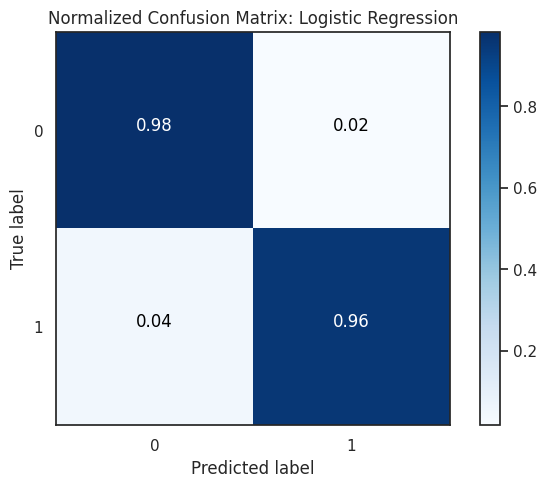

In [ ]:
import numpy as np
sns.set_style('white')

class_names = ['0', '1']
cm = confusion_matrix(y_test, y_predict)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix: Logistic Regression')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

thresh = cm_normalized.max() / 2.

for i, j in itertools.product(range(cm_normalized.shape[0]), range(cm_normalized.shape[1])):
    plt.text(j, i, format(cm_normalized[i, j], '.2f'),
             horizontalalignment="center",
             color="white" if cm_normalized[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))

Precision: 0.9831
Recall: 0.9551
F1 Score: 0.9689


**Precision** represents the accuracy of the positive predictions. In this case, it means that around **98% of the predicted positive cases are actually true positive cases**.

**Recall**, also known as sensitivity or true positive rate, measures the model's ability to correctly identify positive cases. With a recall score of 0.9533, it suggests that the model can identify **95.33% of the actual positive cases**.

The **F1 score** is the harmonic mean of precision and recall, providing a balanced measure of the model's performance. The F1 score of **96.81% indicates a good balance between precision and recall**.